This code was constructed referencing the work of [Nadin Tamer](https://www.kaggle.com/nadintamer), a user here on Kaggle that has done analysis on top Spotify tracks for a few years now. 

Additionally, this is my first venture into using Python. I'm completely open to constructive criticism; if you have a suggestion or a comment, please leave it below!

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/top-spotify-tracks-of-2019/top2019.csv


# Importing Necessary Libraries

For this analysis, let's use numpy, pandas, matplotlib.pyplot, and seaborn. 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


Let's read in the data and get an idea of what our data looks like.

In [3]:

music = pd.read_csv("../input/top-spotify-tracks-of-2019/top2019.csv")
music.head() #Displaying the first 5 entries


,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6v3KW9xbzN5yKLt9YKDYA,Señorita,Shawn Mendes,0.759,0.548,9.0,-6.049,0.0,0.0290,0.0392,0.00,0.0828,0.749,116.967,190800.0,4.0
1,2Fxmhks0bxGSBdJ92vM42,bad guy,Billie Eilish,0.701,0.425,7.0,-10.965,1.0,0.3750,0.3280,0.13,0.1000,0.562,135.128,194088.0,4.0
2,0RiRZpuVRbi7oqRdSMwhQ,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,0.755,0.522,2.0,-4.368,1.0,0.0575,0.5330,0.00,0.0685,0.925,89.960,157560.0,4.0
3,6ocbgoVGwYJhOv1GgI9Ns,7 rings,Ariana Grande,0.778,0.317,1.0,-10.732,0.0,0.3340,0.5920,0.00,0.0881,0.327,140.048,178627.0,4.0
4,2YpeDb67231RjR0MgVLzs,Old Town Road - Remix,Lil Nas X,0.878,0.619,6.0,-5.560,1.0,0.1020,0.0533,0.00,0.1130,0.639,136.041,157067.0,4.0


In [4]:
music.describe(include="all")

#NaN == Not a Number - indicates qualitative variables.

#Note that this table just provides some descriptive statistics so we can continue getting an idea of what each value means,
#and what values we should be expecting to find.



,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,50,50,50,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
unique,50,50,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,43zdsphuZLzwA9k4DJhU0,Talk (feat. Disclosure),Post Malone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.719400,0.60462,5.280000,-6.229000,0.580000,0.127582,0.299381,0.006039,0.132792,0.490460,120.425700,201691.620000,4.0
std,NaN,NaN,NaN,0.130358,0.16975,3.295266,2.725249,0.498569,0.103008,0.255321,0.029065,0.074088,0.219144,28.740856,44213.177325,0.0
min,NaN,NaN,NaN,0.351000,0.11100,0.000000,-14.505000,0.000000,0.029000,0.005130,0.000000,0.057400,0.120000,71.105000,113000.000000,4.0
25%,NaN,NaN,NaN,0.657500,0.52000,2.000000,-7.056000,0.000000,0.053675,0.095900,0.000000,0.088425,0.330500,97.316000,175840.000000,4.0
50%,NaN,NaN,NaN,0.743000,0.62400,5.000000,-5.759000,1.000000,0.081350,0.244000,0.000000,0.106000,0.495000,116.125500,193657.500000,4.0
75%,NaN,NaN,NaN,0.814500,0.73225,8.000000,-4.295250,1.000000,0.199000,0.449250,0.000003,0.141250,0.637000,137.478750,215372.250000,4.0


# Analysis

In [5]:
quant = music.drop(['id','name', 'artists'], axis=1) #Creating a table for the quantitative data
smallQuant = quant.drop(['tempo','duration_ms','key','loudness','time_signature'], axis = 1) #Table for data 0 <= x <= 1

sns.set_palette('rocket') #Style choice

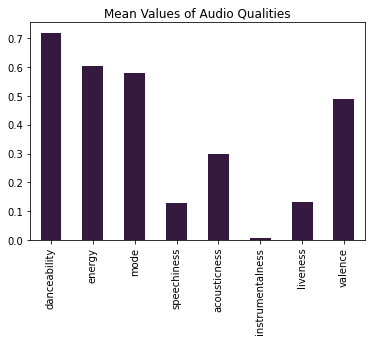

In [6]:
#Let's make our first bar chart. This should give us an idea of how 'danceable' a song is on average, or what the energy of a popular song is on average. 

smallQuant.mean().plot.bar() #Creates a bar chart of the mean values of all variables with values 0 < x < 1.
plt.title('Mean Values of Audio Qualities')
plt.show()

This gives us a fantastic impression of what qualities, in general, constitute a popular song on Spotify. Note that all of these values are on a scale from 0-1, e.g. a song that is easier to dance to  will have a danceability score closer to 1. We can see that the database consists of songs that have an average of ~0.71 and ~0.58 danceability and energy. We also notice that speechiness and instrumentalness are quite low, meaning that songs with vocals are more popular than instrumentals, but songs that are made up of vocals without backing instruments also do not take up much space on the chart. This shouldn't come as a surprise to anyone who listens to top 40 radio, as there isn't very much spoken-word poetry on the list.

# Energy and Danceability

Mean energy levels: 0.6046199999999999


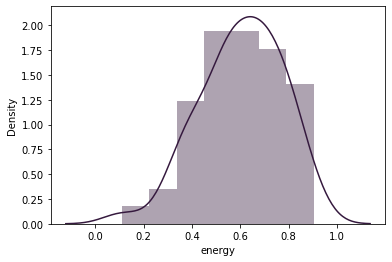

Mean danceability value: 0.7194000000000002


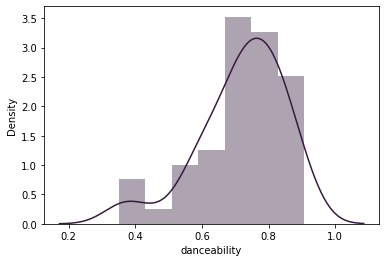

In [7]:
print("Mean energy levels:", music['energy'].mean())
sns.distplot(music['energy']) #Distribution plot of energy
plt.show()

print("Mean danceability value:", music['danceability'].mean())
sns.distplot(music['danceability'])

plt.show()

We can see that, in general, popular songs have energy levels > 0.50 and danceability levels > 0.60. 

Both variables appear to be normally distributed and left-skewed.

**Inference:** Popular songs tend to have higher energy. Popular songs tend to have higher danceability.

**Questions Raised:** Why are high-energy and danceable songs more popular? Is this because of the positive emotions and endorphins they drum up? Do younger people tend to like higher energy songs, and do younger people make up a large-enough percentage of Spotify's userbase to influence this? - Yes, over half of Spotify's userbase is under the age of 35. 
 

**Inaccurate Inferences:** ~~High enery songs are more popular. High danceability songs are more popular.~~ These inferences are imprecise - There exist songs that are high-energy but are not popular (Pick your favorite Jazz track and you'll probably find that it's not in the top 40). The same goes for danceability - Swing songs would likely score high on danceability, but are certainly not present in today's top songs.

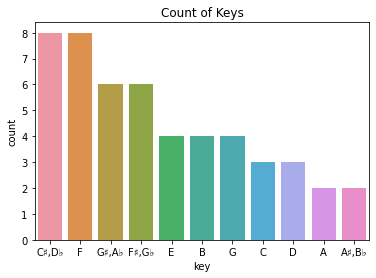

In [8]:
#Information on Qualitative data - we need to map some values to our qualitative data to create plots. 
#We'll do this by scale.

note_mapping = {0.0: 'C', 1.0: 'C♯,D♭', 2.0: 'D', 3.0: 'D♯,E♭', 4.0: 'E', 5.0: 'F', 6.0: 'F♯,G♭', 7.0: 'G', 8.0: 'G♯,A♭', 9.0: 'A', 10.0: 'A♯,B♭', 11.0: 'B'}
music['key'] = music['key'].map(note_mapping) #Maps each note to an integer

sns.countplot(x = 'key', data = music, order =music['key'].value_counts().index)
sns.set_palette('mako')
plt.title("Count of Keys")
plt.show()


We can see that C♯,D♭ and F are the keys that occur most frequently. Note that C♯ and D♭ are enharmonic equivalents - they produce the same pitch.

**Questions Raised** Why are these keys the most popular? C# is most commonly used in rock music, which is largely not present in the top tracks. 

# Heatmap

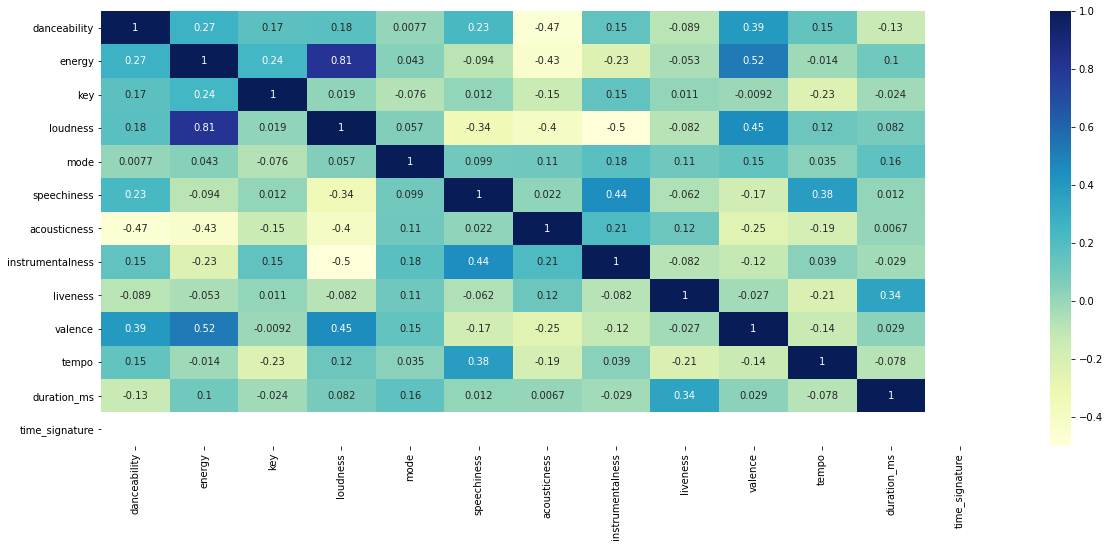

In [9]:
plt.figure(figsize = (20,8))
sns.heatmap(quant.corr(), cmap="YlGnBu", annot=True)
plt.show()

This heatmap shows us the correlation between each variable - the closer the value to 1, the stronger the correlation. For example, energy and loudness have a correlation coefficient of 0.81 - the data suggests a strong correlation between the loudness of a song and the energy of a song. Common sense check; does this match up with your experience of music? 

Another common sense check - does it make sense that acousticness has a negative correlation of > 0.40 with danceability, energy, and loudness? Absolutely! As a song gets 'more acoustic' it's less likely that the song is written such that it's meant to be played in a club with everyone dancing. As a song gets 'more acoustic', the energy and loudness will be lower to match the mellow energy of a typical acoustic track.

A particularly interesting point comes at the instrumentalness-speechiness correlation of 0.44. Shouldn't it be the case that a highly instrumental track is *not* wordy? A possible explanation to explore here is that hip-hop music is counted as both highly instrumental and speechy. Since hip-hop accounts for a large portion of the top tracks, this genre alone could drive this correlation. Let's confirm!